In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

## Plots for statistics: OLS, Lasso, Ridge, OLS_Lasso, OLS_Ridge, Lasso_Ridge

In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
    X = np.column_stack((x_1, x_2))
    statistic = None
    if model == 1:
        ols = sm.OLS(y, X).fit()
        statistic =  (ols.model.endog-ols.fittedvalues)**2
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (lasso.model.endog-lasso.fittedvalues)**2
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (ridge.model.endog-ridge.fittedvalues)**2
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)


print(setup_test_mse(1000, 1, .1, 1, 1))

20.81179509712928


### Varying values

In [3]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    for i in n: 
        y, x_1, x_2 = gen_data(nobs=i, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(i, k, a, m, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    plt.legend()
    plt.show()

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    for i in a: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, i, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, i, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    for i in k: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, i, a, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()    
    
def params_scatter(model):
    single_models = [1,2,3]
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    if model in single_models:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            plt.scatter(range(len(x.params)), x.params, label=i)
        plt.legend()
        plt.show()
    else:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            for j in list(setup_test_params(y, x_1, x_2, a, model)):
                plt.scatter(range(len(j.params)), j.params)
        plt.legend(['model1','model2'])
        plt.show()

Vary Observations
Mean: 7.301227431607512 Median: 7.333731288908286 Mode: [[4.680612]] Variance: 0.6371050534038518
Mean: 11.329442521827454 Median: 11.35214270160747 Mode: [[8.5194619]] Variance: 0.713535062086382
Mean: 15.903343004779622 Median: 15.938630647534573 Mode: [[12.85116768]] Variance: 0.779941665945826
Mean: 22.41880162003124 Median: 22.415338248025705 Mode: [[19.22227108]] Variance: 0.7476016135143597


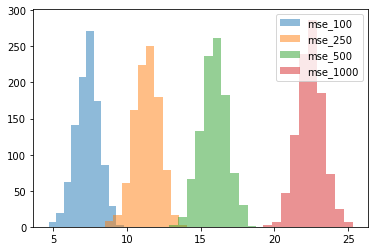

Vary Alpha Levels
Mean: 22.40682662597486 Median: 22.45729157288911 Mode: [[19.45899493]] Variance: 0.6811083878634911
Mean: 22.47770634793487 Median: 22.51933613318638 Mode: [[19.92430406]] Variance: 0.761270628584585
Mean: 22.47419264790378 Median: 22.478269806934858 Mode: [[19.92380664]] Variance: 0.7348410763155451
Mean: 22.442350808205855 Median: 22.463845649765013 Mode: [[19.22947947]] Variance: 0.7498041928757778


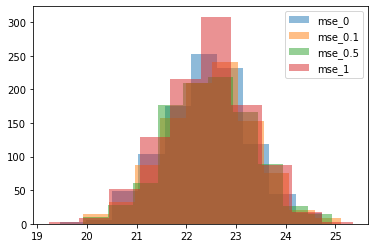

Vary Multiplicative Factors
Mean: 22.441457305910625 Median: 22.438374916439223 Mode: [[19.39815335]] Variance: 0.7388876718503846
Mean: 22.4576562973273 Median: 22.466723541531678 Mode: [[19.30078299]] Variance: 0.7562186405809351
Mean: 22.373823015316958 Median: 22.39320310103033 Mode: [[19.65165579]] Variance: 0.7473317717408381
Mean: 22.435767646718478 Median: 22.427960151433105 Mode: [[18.88674317]] Variance: 0.7296332151601731


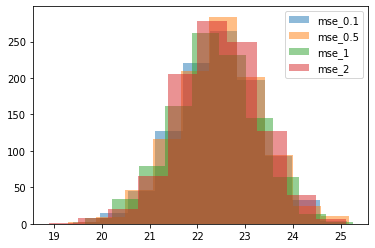

Vary X Variables
Mean: 22.46276904584021 Median: 22.516542112534232 Mode: [[19.10934925]] Variance: 0.6750944660222459
Mean: 22.439388019061326 Median: 22.473477958268955 Mode: [[19.86999714]] Variance: 0.7603371273316716
Mean: 22.391363986266022 Median: 22.396105357962526 Mode: [[19.97732166]] Variance: 0.6670364377706777
Mean: 22.45929864514088 Median: 22.475318216345777 Mode: [[18.36553741]] Variance: 0.7201842553004404


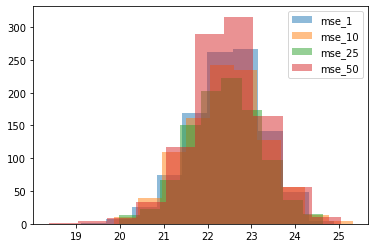

Plot Coefficients


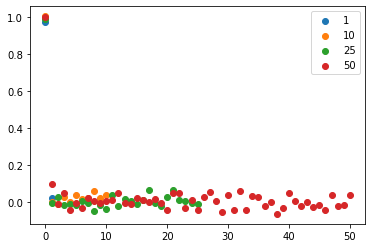

In [4]:
# Model = 1 is OLS
print('Vary Observations')
vary_obs(1)
print('Vary Alpha Levels')
vary_alpha(1)
print('Vary Multiplicative Factors')
vary_multiply(1)
print('Vary X Variables')
vary_xvars(1)
print('Plot Coefficients')
params_scatter(1)

Vary Observations
Mean: 7.29319610221928 Median: 7.317501096096734 Mode: [[4.40734442]] Variance: 0.6264456680583778
Mean: 11.38083036370517 Median: 11.35885130889788 Mode: [[8.96925815]] Variance: 0.6953694078599276
Mean: 15.922470172157261 Median: 15.95695099064238 Mode: [[12.52733086]] Variance: 0.7135002490206184
Mean: 22.443002587503678 Median: 22.44208891350553 Mode: [[19.75384828]] Variance: 0.7348098147198555


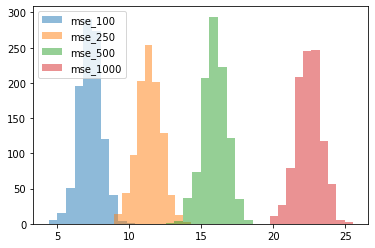

Vary Alpha Levels
Mean: 22.44457975625705 Median: 22.46486511779306 Mode: [[19.3679321]] Variance: 0.7155050610585171
Mean: 22.429324998386626 Median: 22.45272141161179 Mode: [[19.05813287]] Variance: 0.6893403343790211
Mean: 22.43798556607402 Median: 22.43880279512331 Mode: [[19.32561329]] Variance: 0.7638106017478739
Mean: 22.45403169564911 Median: 22.46753498300798 Mode: [[19.93325394]] Variance: 0.7076721682899438


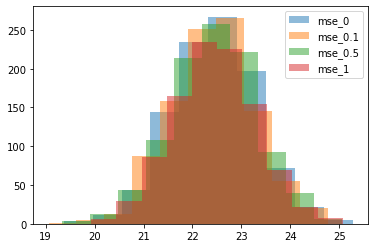

Vary Multiplicative Factors
Mean: 22.45543956974578 Median: 22.459602665339244 Mode: [[19.68546889]] Variance: 0.7167762558305553
Mean: 22.39924266485451 Median: 22.41396718191387 Mode: [[19.58886602]] Variance: 0.7436787484708733
Mean: 22.40378896965753 Median: 22.41121500496349 Mode: [[19.64539423]] Variance: 0.7029714638934857
Mean: 22.435679683481332 Median: 22.44127719117443 Mode: [[19.04756563]] Variance: 0.7285425217086385


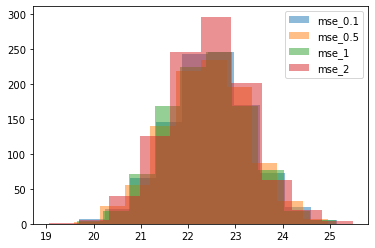

Vary X Variables
Mean: 22.44824803890814 Median: 22.46410445501217 Mode: [[19.21197934]] Variance: 0.6795300142971062
Mean: 22.402505693665102 Median: 22.426543371320868 Mode: [[19.53305444]] Variance: 0.6423694019108818
Mean: 22.408535315321714 Median: 22.422927051377727 Mode: [[19.12748657]] Variance: 0.7574587642508893
Mean: 22.42286556569381 Median: 22.474099266338023 Mode: [[18.82175913]] Variance: 0.7412215710498578


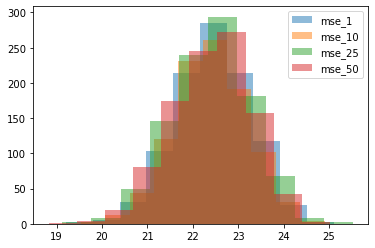

Plot Coefficients


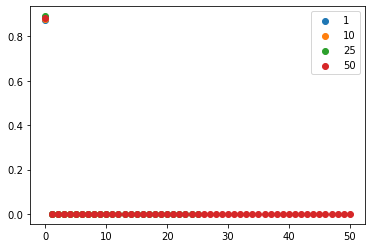

In [5]:
# Model = 2 is Lasso
print('Vary Observations')
vary_obs(2)
print('Vary Alpha Levels')
vary_alpha(2)
print('Vary Multiplicative Factors')
vary_multiply(2)
print('Vary X Variables')
vary_xvars(2)
print('Plot Coefficients')
params_scatter(2)

Vary Observations
Mean: 7.338751372246349 Median: 7.332988746613831 Mode: [[4.58251848]] Variance: 0.6286305750026797
Mean: 11.313155826209947 Median: 11.30095780135555 Mode: [[7.65230317]] Variance: 0.7850258498168695
Mean: 15.924901302029468 Median: 15.928167828431505 Mode: [[12.93861346]] Variance: 0.7418736499828302
Mean: 22.44418876982109 Median: 22.46885409259531 Mode: [[19.62329357]] Variance: 0.7498387495365375


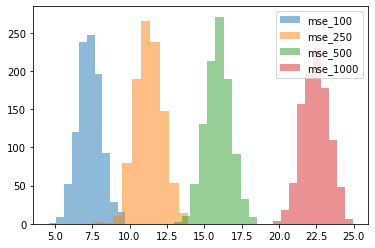

Vary Alpha Levels
Mean: 22.45113135528329 Median: 22.45001244123084 Mode: [[19.61015148]] Variance: 0.7881940244868231
Mean: 22.472232688954534 Median: 22.515548066808073 Mode: [[19.6795519]] Variance: 0.7257287562012592
Mean: 22.44195165183208 Median: 22.458538915894948 Mode: [[19.18323904]] Variance: 0.7192270704949528
Mean: 22.466923768963177 Median: 22.478921948634586 Mode: [[19.4244959]] Variance: 0.7095078552466825


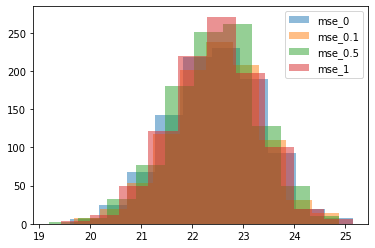

Vary Multiplicative Factors
Mean: 22.44261182030645 Median: 22.438103196416176 Mode: [[19.70499913]] Variance: 0.6945462302807556
Mean: 22.446023911150135 Median: 22.469950879462573 Mode: [[19.1173752]] Variance: 0.7750925239692217
Mean: 22.45888170401844 Median: 22.472115093308176 Mode: [[19.58574156]] Variance: 0.7447104538930223
Mean: 22.445795399385997 Median: 22.464063497572674 Mode: [[19.66006951]] Variance: 0.682402007161771


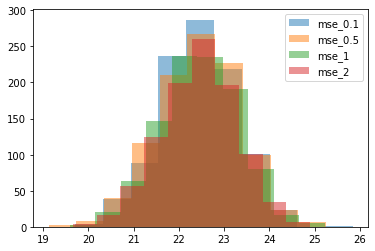

Vary X Variables
Mean: 22.423383530327943 Median: 22.415994589244374 Mode: [[19.63729947]] Variance: 0.7607528835920773
Mean: 22.482272952582356 Median: 22.477287192712502 Mode: [[19.78423223]] Variance: 0.8076697926632006
Mean: 22.433491783718214 Median: 22.443921934583997 Mode: [[19.9472131]] Variance: 0.6839830741652232
Mean: 22.46770865861389 Median: 22.439342088841027 Mode: [[19.09925753]] Variance: 0.7509400657690986


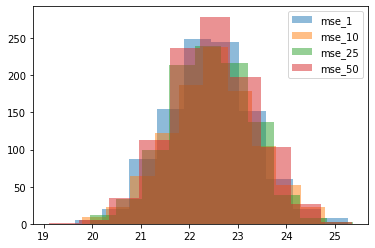

Plot Coefficients


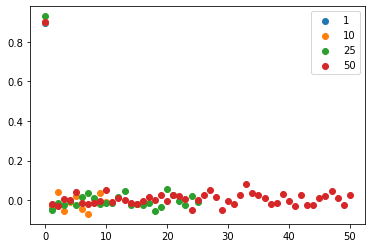

In [6]:
# Model = 3 is Ridge
print('Vary Observations')
vary_obs(3)
print('Vary Alpha Levels')
vary_alpha(3)
print('Vary Multiplicative Factors')
vary_multiply(3)
print('Vary X Variables')
vary_xvars(3)
print('Plot Coefficients')
params_scatter(3)

Vary Observations
Mean: -1.3414252593382965 Median: -1.3321356573572598 Mode: [[-2.19587983]] Variance: 0.050395138813085154
Mean: -1.6530931912101479 Median: -1.6526739482430806 Mode: [[-2.70042294]] Variance: 0.06486506913962603
Mean: -1.9183821197626574 Median: -1.9096038862042555 Mode: [[-3.02451122]] Variance: 0.07004475537131359
Mean: -2.2277020935900276 Median: -2.2212265806887928 Mode: [[-3.29355798]] Variance: 0.06727586920134625


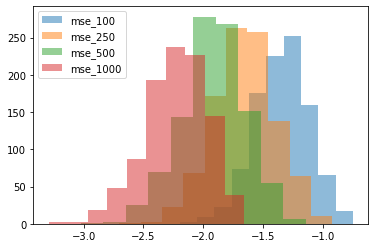

Vary Alpha Levels
Mean: -0.0001950309845523732 Median: 2.8998266594522312e-05 Mode: [[-0.08329087]] Variance: 4.765011326745262e-05
Mean: -2.233807542305826 Median: -2.2145915821681554 Mode: [[-3.4327571]] Variance: 0.0632034321072927
Mean: -7.636917511448193 Median: -7.621904791558284 Mode: [[-8.71765985]] Variance: 0.11009188573388898
Mean: -13.074808382911394 Median: -13.067711183498304 Mode: [[-14.83676948]] Variance: 0.2952142195913037


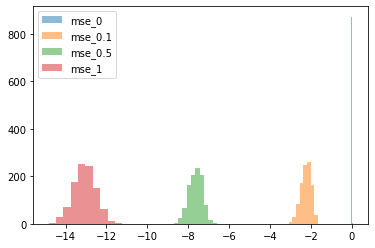

Vary Multiplicative Factors
Mean: -2.114184123979576 Median: -2.121614289798573 Mode: [[-3.04218311]] Variance: 0.09601620358213087
Mean: -2.21615147900064 Median: -2.1924807710407896 Mode: [[-3.23207224]] Variance: 0.06502857148752639
Mean: -2.241450679448646 Median: -2.2303707797910013 Mode: [[-3.53238908]] Variance: 0.06457867484072657
Mean: -2.2137579289253675 Median: -2.1817516774200785 Mode: [[-3.12815035]] Variance: 0.06436531960212112


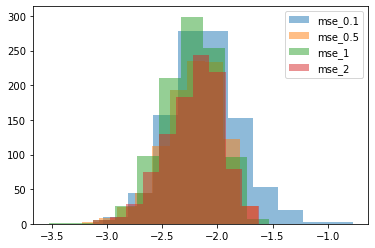

Vary X Variables
Mean: -1.6597115251767116 Median: -1.6384190341985536 Mode: [[-2.1709094]] Variance: 0.013866120133984718
Mean: -2.219094015896806 Median: -2.1932862782559623 Mode: [[-3.21701288]] Variance: 0.05812803981033888
Mean: -2.954814109545844 Median: -2.9447205898006157 Mode: [[-4.18752364]] Variance: 0.10230777027042746
Mean: -3.9315619875049546 Median: -3.9346631290971343 Mode: [[-5.15441409]] Variance: 0.1276971735990504


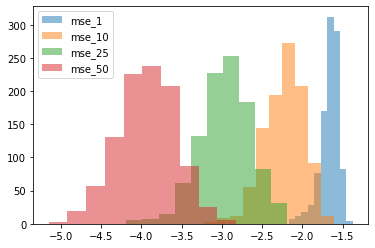

In [7]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary Multiplicative Factors')
vary_multiply(4)
print('Vary X Variables')
vary_xvars(4)

Vary Observations
Mean: -0.5428699501167383 Median: -0.5371530576287092 Mode: [[-0.8831619]] Variance: 0.00873635850427655
Mean: -0.7722411156250054 Median: -0.7657238459481923 Mode: [[-1.10030105]] Variance: 0.007230596417132438
Mean: -1.0560043382376667 Median: -1.0551721353944499 Mode: [[-1.40577263]] Variance: 0.006216562821204523
Mean: -1.4607790648594552 Median: -1.458990977554025 Mode: [[-1.74563378]] Variance: 0.005613318251364062


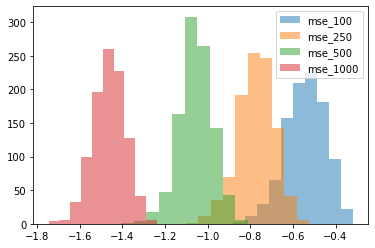

Vary Alpha Levels
Mean: 0.005395649294543394 Median: 0.0028356768350274175 Mode: [[-1.98524714]] Variance: 0.21936314954120725
Mean: -12.18823432498592 Median: -12.180267966389634 Mode: [[-13.72232332]] Variance: 0.24313104652672915
Mean: -20.692852253003082 Median: -20.70588543163345 Mode: [[-23.5982265]] Variance: 0.6270779031268638
Mean: -21.630924449788473 Median: -21.626515582947285 Mode: [[-24.16735249]] Variance: 0.6818259920649912


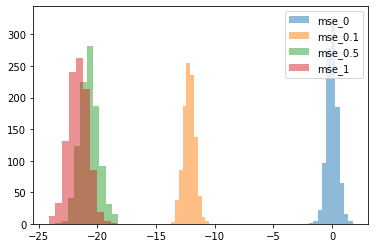

Vary Multiplicative Factors
Mean: -0.2080863291868749 Median: -0.20617730063633016 Mode: [[-0.34608208]] Variance: 0.0016899376380901875
Mean: -0.7420131154723932 Median: -0.7414990734726138 Mode: [[-0.95925134]] Variance: 0.003455774777838238
Mean: -1.4597583922561872 Median: -1.4571054167205681 Mode: [[-1.7359834]] Variance: 0.005963283927584485
Mean: -2.880956538968926 Median: -2.8802555710373405 Mode: [[-3.35724937]] Variance: 0.016178059469918998


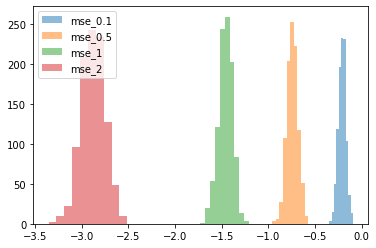

Vary X Variables
Mean: -1.4414247099118098 Median: -1.4435250852981631 Mode: [[-1.66884344]] Variance: 0.005786470913666686
Mean: -1.458895057359956 Median: -1.4578530371689815 Mode: [[-1.69383212]] Variance: 0.00592069490586846
Mean: -1.4874247280812825 Median: -1.4861251511112092 Mode: [[-1.78410156]] Variance: 0.006649767321444716
Mean: -1.5455781341306924 Median: -1.539670245968396 Mode: [[-1.87622919]] Variance: 0.006585996879777502


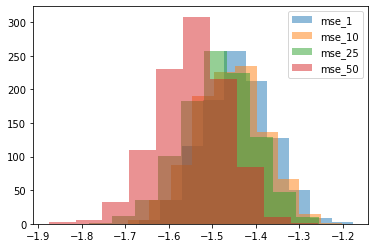

In [8]:
# Model = 5 is OlS - Ridge
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary Multiplicative Factors')
vary_multiply(5)
print('Vary X Variables')
vary_xvars(5)

Vary Observations
Mean: 1.4086114462221924 Median: 1.3946908211817513 Mode: [[0.48818281]] Variance: 0.08047123072680971
Mean: 1.6628883694189023 Median: 1.6524013524240726 Mode: [[0.63361731]] Variance: 0.08988148048960125
Mean: 1.8297134496182381 Median: 1.8345678773856375 Mode: [[0.89678909]] Variance: 0.1181908137422816
Mean: 1.9623902862357503 Median: 1.9523395411692743 Mode: [[1.09632357]] Variance: 0.10834368325792872


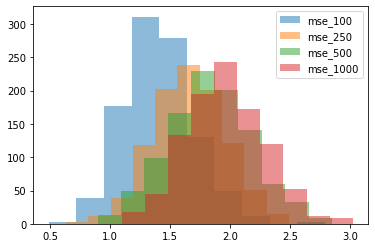

Vary Alpha Levels
Mean: -5.4887900624503264e-05 Median: 4.7214162425827046e-05 Mode: [[-0.23740918]] Variance: 9.16813133343369e-05
Mean: -12.898280455521515 Median: -12.891340444534208 Mode: [[-14.36457127]] Variance: 0.2823053855824388
Mean: -21.018261757895942 Median: -21.0301434876423 Mode: [[-23.66623695]] Variance: 0.6727445261368841
Mean: -21.85374817235073 Median: -21.856697577185365 Mode: [[-24.38926961]] Variance: 0.6405385737726051


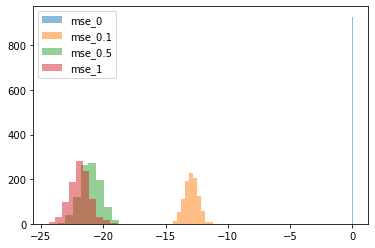

Vary Multiplicative Factors
Mean: 2.3110374747895275 Median: 2.315829694090534 Mode: [[1.04826322]] Variance: 0.12230933872560834
Mean: 2.6543723537707926 Median: 2.627831097208201 Mode: [[2.10805696]] Variance: 0.056906734647400266
Mean: 1.9912561757037022 Median: 1.9855616674149825 Mode: [[1.07073211]] Variance: 0.10473803918001291
Mean: -1.7994807770094685 Median: -1.8174693469042738 Mode: [[-3.85645647]] Variance: 0.6011718087774437


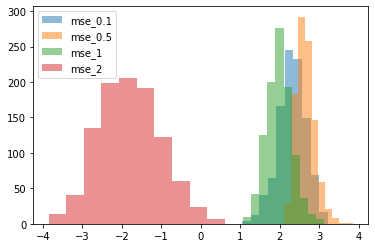

Vary X Variables
Mean: 1.8124615070858219 Median: 1.637151611375287 Mode: [[0.24858112]] Variance: 0.32632470730275565
Mean: 1.9880095212732636 Median: 1.9753755345419743 Mode: [[1.07979471]] Variance: 0.1089985387007882
Mean: 2.866093996543649 Median: 2.862501785051176 Mode: [[1.88920893]] Variance: 0.13317584853468195
Mean: 3.9866472069618304 Median: 3.978113076099094 Mode: [[2.73209698]] Variance: 0.1546112036191189


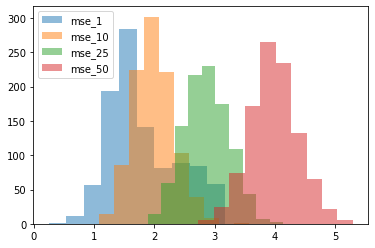

In [9]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary Multiplicative Factors')
vary_multiply(6)
print('Vary X Variables')
vary_xvars(6)

## Vary Relevant X-Variables

In [6]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m, num_relevant_cov):
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    y = (x_1.sum(axis=1) * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, c, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m, num_relevant_cov=c)
    X = np.column_stack((x_1, x_2))
    statistic = None
    if model == 1:
        ols = sm.OLS(y, X).fit()
        statistic =  (ols.model.endog-ols.fittedvalues)**2
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (lasso.model.endog-lasso.fittedvalues)**2
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (ridge.model.endog-ridge.fittedvalues)**2
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)

In [7]:
# Vary number of relevant x variables
def vary_relevant_xvars(model):
    k = [1,5,15,20]
    c = [24,20,10,5]
    m = 1
    a = 0.1
    n = 1000
    for i, j in zip(k, c): 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m, num_relevant_cov=j)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for l in range(1000):
            results = setup_test_mse(n, i, a, m, j, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

Vary Relevant X Variables
Mean: 22.409413733064497 Median: 22.415256343126348 Mode: [[19.4482485]] Variance: 0.7041755856057333
Mean: 22.461027516045398 Median: 22.49169712282245 Mode: [[18.81551371]] Variance: 0.7151661820626147
Mean: 22.463251433198725 Median: 22.47321511977831 Mode: [[19.42063719]] Variance: 0.691826247539974
Mean: 22.46158478609111 Median: 22.491668215634796 Mode: [[19.85740306]] Variance: 0.7326189495721168


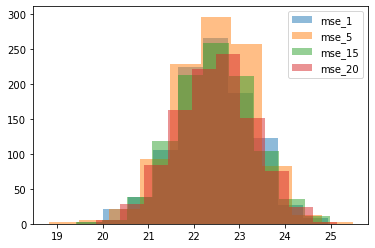

In [8]:
print('Vary Relevant X Variables')
vary_relevant_xvars(1)   

Vary Relevant X Variables
Mean: 22.459774060128836 Median: 22.44619715321938 Mode: [[19.97305373]] Variance: 0.6997611697645572
Mean: 22.437523216901152 Median: 22.436350140902167 Mode: [[19.37671893]] Variance: 0.7197111932041422
Mean: 22.44598954532341 Median: 22.450777921775035 Mode: [[19.65903936]] Variance: 0.6974472972201431
Mean: 22.425687603194444 Median: 22.45093621636544 Mode: [[19.78434978]] Variance: 0.7417681462193516


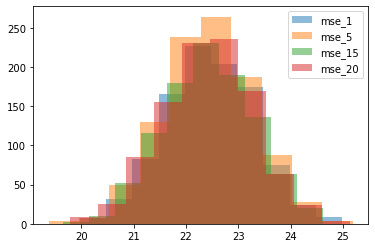

In [9]:
print('Vary Relevant X Variables')
vary_relevant_xvars(2)   

Vary Relevant X Variables
Mean: 22.420514406096036 Median: 22.448655579943946 Mode: [[19.34550709]] Variance: 0.7342497817319715
Mean: 22.485292991204915 Median: 22.480180873690855 Mode: [[19.74502213]] Variance: 0.6928691936297002
Mean: 22.4340003248734 Median: 22.43301402131275 Mode: [[18.13737974]] Variance: 0.7213923657356367
Mean: 22.426798450591086 Median: 22.395166811588084 Mode: [[19.99897765]] Variance: 0.7030953426303088


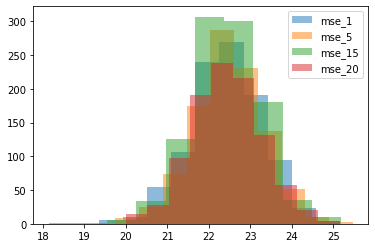

In [10]:
print('Vary Relevant X Variables')
vary_relevant_xvars(3)   

Vary Relevant X Variables
Mean: -7.5230193347650465 Median: -7.521767706090454 Mode: [[-8.52380884]] Variance: 0.10400481847628266
Mean: -6.963174865625386 Median: -6.969099718806188 Mode: [[-8.33744328]] Variance: 0.09822117551041541
Mean: -5.312895103908593 Median: -5.30927302714313 Mode: [[-6.22360986]] Variance: 0.06766318076789764
Mean: -4.173900589892472 Median: -4.165881982715391 Mode: [[-4.95979944]] Variance: 0.06135706995334372


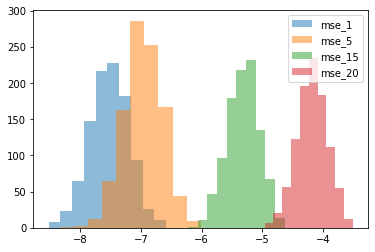

In [11]:
print('Vary Relevant X Variables')
vary_relevant_xvars(4)   

Vary Relevant X Variables
Mean: -6.875583529964593 Median: -6.861034060800154 Mode: [[-7.80826234]] Variance: 0.08201956230800383
Mean: -6.310671347762733 Median: -6.311307541443059 Mode: [[-7.13724051]] Variance: 0.07040750354662322
Mean: -4.554533962753289 Median: -4.55058414336405 Mode: [[-5.1943461]] Variance: 0.039795541061456594
Mean: -3.2656688915025986 Median: -3.261814384071819 Mode: [[-3.76463523]] Variance: 0.02036433198502445


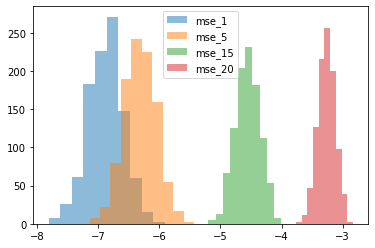

In [12]:
print('Vary Relevant X Variables')
vary_relevant_xvars(5)   

Vary Relevant X Variables
Mean: 10.72771237357978 Median: 10.999775227370506 Mode: [[6.54490996]] Variance: 1.8094456897291233
Mean: 7.440019525310876 Median: 7.307475319431333 Mode: [[4.69985837]] Variance: 1.4004382994062208
Mean: 4.088161396126763 Median: 4.070116763627248 Mode: [[2.89449948]] Variance: 0.15952425177785234
Mean: 3.2684902415440815 Median: 3.252772567203654 Mode: [[2.32758494]] Variance: 0.11052644230997875


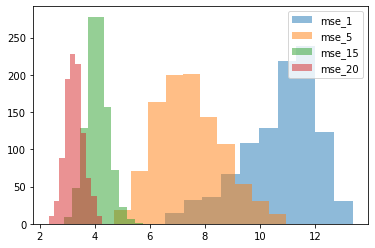

In [13]:
print('Vary Relevant X Variables')
vary_relevant_xvars(6)   

## Vary m, relevant x-variables, and covariates together

In [14]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m, num_relevant_cov):
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    y = (x_1.sum(axis=1) * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, c, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m, num_relevant_cov=c)
    X = np.column_stack((x_1, x_2))
    statistic = None
    if model == 1:
        ols = sm.OLS(y, X).fit()
        statistic =  (ols.model.endog-ols.fittedvalues)**2
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (lasso.model.endog-lasso.fittedvalues)**2
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (ridge.model.endog-ridge.fittedvalues)**2
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)

In [15]:
def vary_xvars_m_num_cov(model):
    k = [1,5,15,20]
    c = [24,20,10,5]
    m = [1, 1/5, 1/15, 1/20]
    a = 0.1
    n = 1000
    for i, j, k in zip(k, c, m): 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=k, num_relevant_cov=j)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for l in range(1000):
            results = setup_test_mse(n, i, a, k, j, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

Mean: 22.44053429805039 Median: 22.415775868342024 Mode: [[19.36470251]] Variance: 0.7547464606122362
Mean: 22.469228682442612 Median: 22.49149206065161 Mode: [[19.45404607]] Variance: 0.7199474271815336
Mean: 22.472302659623328 Median: 22.479125007377775 Mode: [[19.633396]] Variance: 0.7335973705852395
Mean: 22.434617457380718 Median: 22.452523695579934 Mode: [[19.80306933]] Variance: 0.6895140993046245


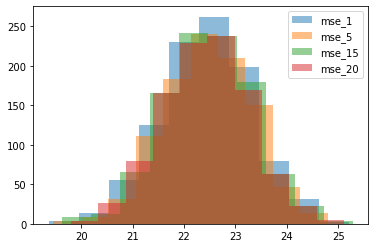

In [16]:
vary_xvars_m_num_cov(1)

Mean: 22.433081339372976 Median: 22.434892173166197 Mode: [[18.83755265]] Variance: 0.6961255927731969
Mean: 22.453648809484232 Median: 22.422221099319074 Mode: [[19.37377719]] Variance: 0.6966670763760667
Mean: 22.424020060381217 Median: 22.439891187285248 Mode: [[19.48710932]] Variance: 0.688699452393498
Mean: 22.3942290187138 Median: 22.402290882298196 Mode: [[19.51392601]] Variance: 0.7622632302908883


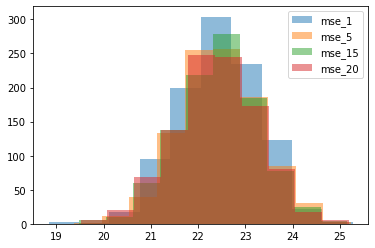

In [17]:
vary_xvars_m_num_cov(2)

Mean: 22.390627223457372 Median: 22.407447531694324 Mode: [[19.42367876]] Variance: 0.733533244049919
Mean: 22.471303851285555 Median: 22.49753552748969 Mode: [[19.52966541]] Variance: 0.7496333374991262
Mean: 22.45893493988314 Median: 22.478530720915558 Mode: [[19.43428384]] Variance: 0.7712260510035623
Mean: 22.427100539653253 Median: 22.42741937364857 Mode: [[19.59171368]] Variance: 0.779263936412914


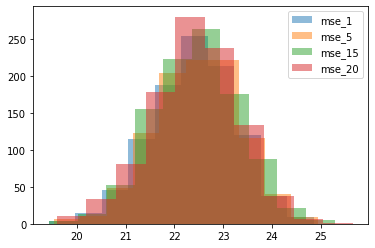

In [18]:
vary_xvars_m_num_cov(3)

Mean: -7.521551818601024 Median: -7.513368126105686 Mode: [[-8.89825802]] Variance: 0.11308555001947643
Mean: -6.978104852343677 Median: -6.971089534499466 Mode: [[-8.00177346]] Variance: 0.09593897658916639
Mean: -3.965315143106469 Median: -3.975093175669422 Mode: [[-5.07377334]] Variance: 0.15054301778590976
Mean: -3.0151464194321558 Median: -3.008503589778483 Mode: [[-4.27181834]] Variance: 0.16354855516019576


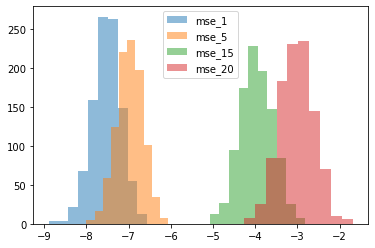

In [19]:
vary_xvars_m_num_cov(4)

Mean: -6.862728269280373 Median: -6.8576738898978356 Mode: [[-7.91936975]] Variance: 0.07906392973976459
Mean: -1.3366738069237187 Median: -1.3314795908402903 Mode: [[-1.60400535]] Variance: 0.0056131420139879295
Mean: -0.38674088947948043 Median: -0.38588188603219215 Mode: [[-0.54235741]] Variance: 0.0022407758136714566
Mean: -0.2860325100656779 Median: -0.2853005897155205 Mode: [[-0.42818031]] Variance: 0.0016790219980346356


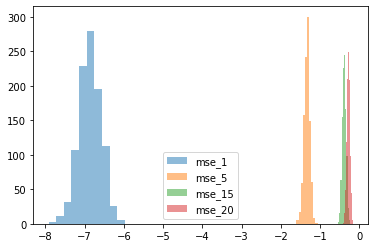

In [20]:
vary_xvars_m_num_cov(5)

Mean: 10.800531019769032 Median: 11.122648500194867 Mode: [[5.5142513]] Variance: 1.7093214784952147
Mean: 8.071870083882198 Median: 8.071920306344317 Mode: [[7.02932398]] Variance: 0.12505392538181043
Mean: 4.350999996299145 Median: 4.3478555678270245 Mode: [[2.93521708]] Variance: 0.170941165943305
Mean: 3.2937360930902866 Median: 3.306861649860746 Mode: [[1.88958207]] Variance: 0.18633684146554041


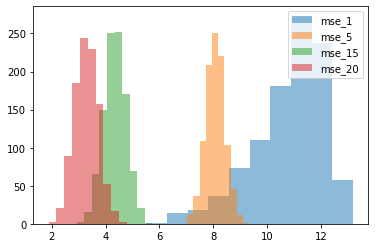

In [21]:
vary_xvars_m_num_cov(6)